### 2.3 Fundamentals of Visualization Libraries Part 1

#### Importing libraries and reading data frame

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [8]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [9]:
df = pd.read_csv('NY_data.csv', index_col = 0)

C:\Users\marze\AppData\Local\Temp\ipykernel_17128\3505775278.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NY_data.csv', index_col = 0)


In [10]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [11]:
left_only_rows = df[df['_merge'] == 'left_only']

# Remove rows that are present only in the left DataFrame
df_filtered = df[df['_merge'] != 'left_only']

# Drop the '_merge' column 
df_filtered.drop(columns='_merge', inplace=True)


C:\Users\marze\AppData\Local\Temp\ipykernel_17128\2676585632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns='_merge', inplace=True)


In [12]:
df_filtered.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [13]:
df_filtered.shape

(29838166, 15)

In [14]:
df_filtered.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [15]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

C:\Users\marze\AppData\Local\Temp\ipykernel_17128\2144458217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


In [16]:
df_filtered.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

#### Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe

In [17]:
df_temp = df_filtered.set_index('date')

In [20]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


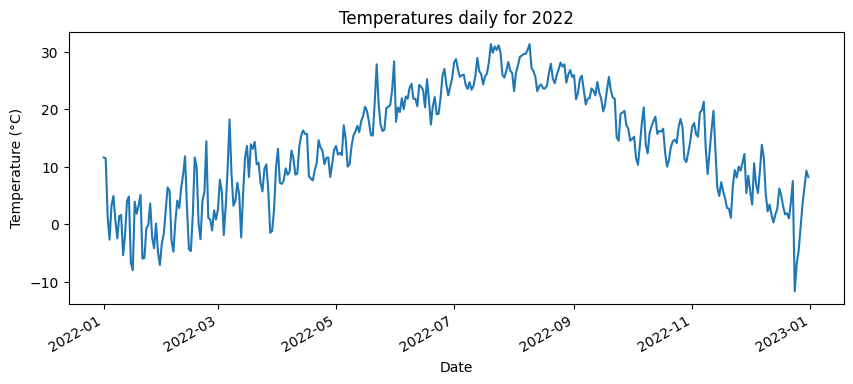

In [19]:
plt.figure(figsize=(10,4))
df_temp['avgTemp'].plot(title='Temperatures daily for 2022', xlabel='Date', ylabel='Temperature (°C)')
plt.show()                                   

#### Create a column with the count of trips per day and merge it with the weather dataframe.

In [21]:
df_filtered.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [22]:
# Groupby the count of the rides

df_group = pd.DataFrame(df_filtered.groupby(['date'])['ride_id'].count()).reset_index()

In [23]:
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [24]:
df_group.tail()

,date,ride_id
360,2022-12-27,33044
361,2022-12-28,44027
362,2022-12-29,51674
363,2022-12-30,62298
364,2022-12-31,31466


In [25]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df_filtered.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

both          29838166
left_only            0
right_only           0
Name: _merge, dtype: int64
Shape of January 1st is (20428, 17)
Shape of January 2nd is (43009, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [26]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0,33598,both
2022-01-21,096AE4C21473D1D6,electric_bike,2022-01-21 20:32:55.968,2022-01-21 20:35:20.227,Riverside Dr & W 91 St,7524.16,Riverside Dr & W 82 St,7388.1,40.793135,-73.977004,40.787209,-73.981281,member,-6.0,33598,both
2022-01-21,B3996D7CAEDF7B92,classic_bike,2022-01-21 09:14:04.856,2022-01-21 09:18:53.000,Henry St & Atlantic Ave,4531.05,Clinton St & Tillary St,4748.07,40.690893,-73.996123,40.696233,-73.991421,member,-6.0,33598,both
2022-01-21,83AE874442FFF355,electric_bike,2022-01-21 17:30:27.244,2022-01-21 17:36:00.300,Cleveland Pl & Spring St,5492.05,Rivington St & Ridge St,5406.02,40.722104,-73.997249,40.718502,-73.983299,member,-6.0,33598,both
2022-01-21,8B1950B6ED5BD50A,electric_bike,2022-01-21 10:12:57.242,2022-01-21 10:31:37.016,1 Ave & E 62 St,6753.08,Allen St & Rivington St,5414.06,40.761227,-73.960940,40.720196,-73.989978,member,-6.0,33598,both


#### Create a line chart of bike trip counts and temperatures plotted on a dual axis

C:\Users\marze\AppData\Local\Temp\ipykernel_17128\1688156148.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df_temp.resample('W').mean()


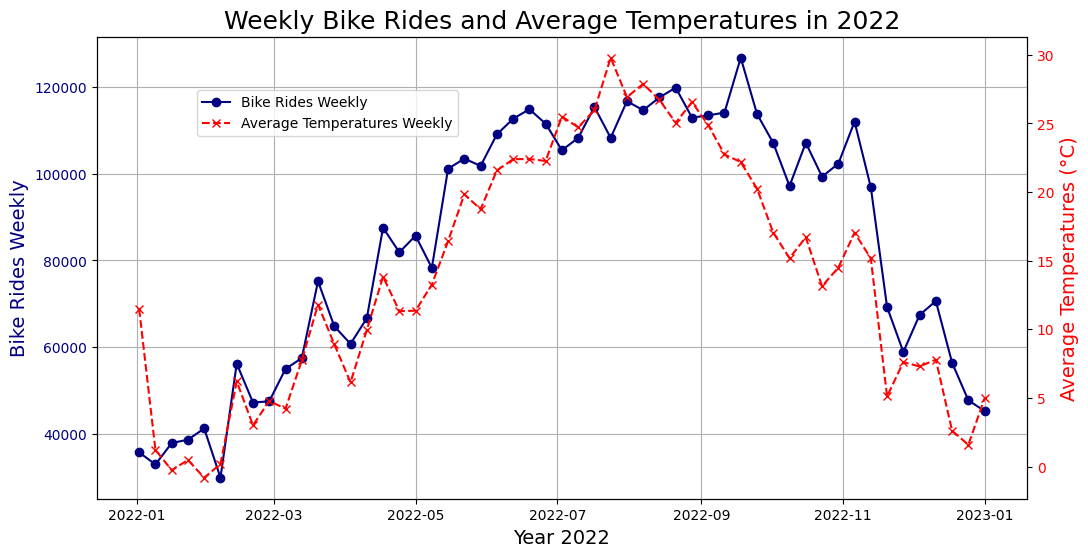

In [27]:
# Resample the data to weekly frequency and calculate the mean
df_weekly = df_temp.resample('W').mean()

# Create figure and axis objects with subplots() and details
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the weekly bike rides on the first axis
ax1.plot(df_weekly['bike_rides_daily'], color='navy', linestyle='-', marker='o', label='Bike Rides Weekly')
ax1.set_xlabel("Year 2022", fontsize=14)
ax1.set_ylabel("Bike Rides Weekly", color='navy', fontsize=14)
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True)

# Initialize a twin object for two different y-axis on the sample plot
ax2 = ax1.twinx()

# Plot the weekly temperatures on the second axis
ax2.plot(df_weekly['avgTemp'], color='red', linestyle='--', marker='x', label='Average Temperatures Weekly')
ax2.set_ylabel("Average Temperatures (°C)", color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Weekly Bike Rides and Average Temperatures in 2022', fontsize=18)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

plt.show()


I used the object-oriented paradigm of Matplotlib. This object-oriented approach allows for precise control over each plot element, making it easier to create complex and customized visualizations. Additionally, due to a large number of data points, the plot as looking crowded, therefore, a weekly sampling was used to achieve the above plot. Here's a breakdown of how I used this paradigm to achieve the plot:

1. Created figure and axes objects
2. Plotted data on the first axis
3. Created twin axis for the second y-axis
4. Plotted data on the second axis
5. Added title and labels
6. Show plot

In [28]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [ ]:
# save the wrangled data
df_filtered.to_csv('NY_data_filtered.csv')

#### Create a histogram of the variable “tripduration” using matplotlib

In [ ]:
df=df_filtered.sample(frac=.01)

In [ ]:
# Convert 'started_at' and 'ended_at' to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate the trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Verify that the 'tripduration' column has been created successfully
print(df[['started_at', 'ended_at', 'trip_duration']])


In [ ]:
df.head()

In [ ]:
df['trip_duration'].max()

In [ ]:
# Create the histogram
plt.figure(figsize=(6, 4))
plt.hist(df['trip_duration'], bins=30, color='blue', edgecolor='black')

# Adjust the x-axis to focus on the range of interest
plt.xlim(0, 3000)  # Adjust this range based on your data

# Add title and labels
plt.title('Histogram of Trip Duration', fontsize=18)
plt.xlabel('Trip Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()